In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [6]:
start = '2012-01-01'
end = '2024-12-25'

In [7]:
stock= 'GOOG'

In [8]:
data = yf.download(stock, start, end)

data.reset_index(inplace=True)

data.dropna(inplace= True)

[*********************100%***********************]  1 of 1 completed


In [9]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.513794,16.581795,16.190173,16.204321,147611217
1,2012-01-04,16.585020,16.633911,16.394919,16.504364,114989399
2,2012-01-05,16.354961,16.478056,16.285969,16.432392,131808205
3,2012-01-06,16.131853,16.379531,16.126144,16.358435,108119746
4,2012-01-09,15.447884,16.056905,15.417357,16.044495,233776981
...,...,...,...,...,...,...
3261,2024-12-18,190.149994,198.690002,189.279999,196.830002,27638400
3262,2024-12-19,189.699997,194.600006,189.520004,193.279999,26981200
3263,2024-12-20,192.960007,194.134995,186.369995,187.009995,45319700


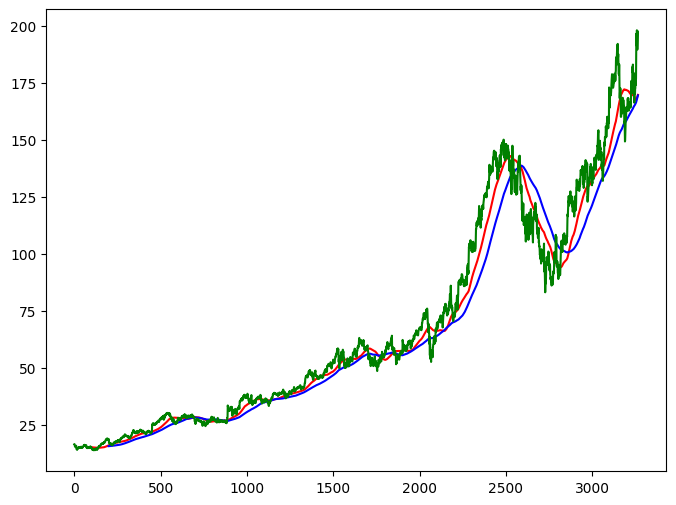

In [10]:
ma_100_days = data.Close.rolling(100).mean()
ma_200_days = data.Close.rolling(200).mean()

plt.figure(figsize=(8,6))

plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [11]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

data_train.shape[0]

data_test.shape[0]

654

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

data_train_scale = scaler.fit_transform(data_train)
x = []
y = []
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i - 100:i])
    y.append(data_train_scale[i, 0])

x, y = np.array(x), np.array(y)
from tensorflow.keras.layers import Dense, Dropout, LSTM, Input
from tensorflow.keras.models import Sequential

In [20]:
# Create a Sequential model
model = Sequential()

# Add an Input layer to define the input shape
model.add(Input(shape=(x.shape[1], 1)))

# Add the LSTM layer
model.add(LSTM(units=50, activation='relu', return_sequences=True))

# Add a Dropout layer to prevent overfitting
model.add(Dropout(0.2))

In [21]:
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

In [22]:
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

In [23]:
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

In [24]:
model.add(Dense(units = 1))

In [25]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x, y, epochs = 50, batch_size = 32, verbose=1)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - loss: 0.0500
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - loss: 0.0052
Epoch 3/50
42/79 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 0.0051